In [8]:
import os
print(os.getcwd())

c:\Users\chahi\Desktop\Age_bone_predection\notebooks


In [1]:
import os

path1 = r"C:\Users\chahi\Desktop\Age_bone_predection\dataset\raw\RSNA\training.csv"
#path2 = r"C:\Users\chahi\Desktop\Age_bone_predection\dataset\raw\Atlas\Atlas.csv"

print("✅ File exists:", os.path.exists(path1))
#print("✅ File exists:", os.path.exists(path2))

✅ File exists: True


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load datasets and concatenate them
df = pd.read_csv(path1)
#df2 = pd.read_csv(path2)


#df = pd.concat([df1, df2], axis=0, ignore_index=True)
#df.to_csv("combined_dataset.csv", index=False)
#print("✅ Datasets concatenated successfully!")

print(f"Nombre total d'entrées : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

Nombre total d'entrées : 12611
Nombre de colonnes : 3


In [4]:
print("\n🔹 Résumé du Dataset:") 
print(df.info())

print("\n🔹 Valeurs manquantes par colonne:")
print(df.isnull().sum())

print("\n🔹Vérifier les doublons :")
print(df.duplicated().sum())


🔹 Résumé du Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       12611 non-null  int64
 1   boneage  12611 non-null  int64
 2   male     12611 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 209.5 KB
None

🔹 Valeurs manquantes par colonne:
id         0
boneage    0
male       0
dtype: int64

🔹Vérifier les doublons :
0


In [ ]:
# Checking if IDs are unique
print("\n🔹 Checking Unique IDs:")
print("Total IDs:", df['id'].nunique(), "/", len(df), "(Should be equal)")



🔹 Checking Unique IDs:
Total IDs: 12611 / 12611 (Should be equal)


In [6]:
print("\n🔹 Bone Age Statistics:")
print(df['boneage'].describe())

#l'asymetrie
print("\n🔹 Bone Age Skewness:", skew(df['boneage']))
#l'aplatissement
print("\n🔹 Bone Age kurtosis:", kurtosis(df['boneage']))


🔹 Bone Age Statistics:
count    12611.000000
mean       127.320752
std         41.182021
min          1.000000
25%         96.000000
50%        132.000000
75%        156.000000
max        228.000000
Name: boneage, dtype: float64

🔹 Bone Age Skewness: -0.47490617648004335

🔹 Bone Age kurtosis: -0.2376825486923302


* Une asymétrie négative signifie que la distribution est est **asymétrique vers la gauche** →  Il y a plus d'enfants avec un âge osseux élevé.

* **applatissement < 3** → Distribution **platykurtique** (**plus aplatie** qu'une distribution normale).  

* Les données contiennent **moins de valeurs aberrantes** (**moins d'outliers**).

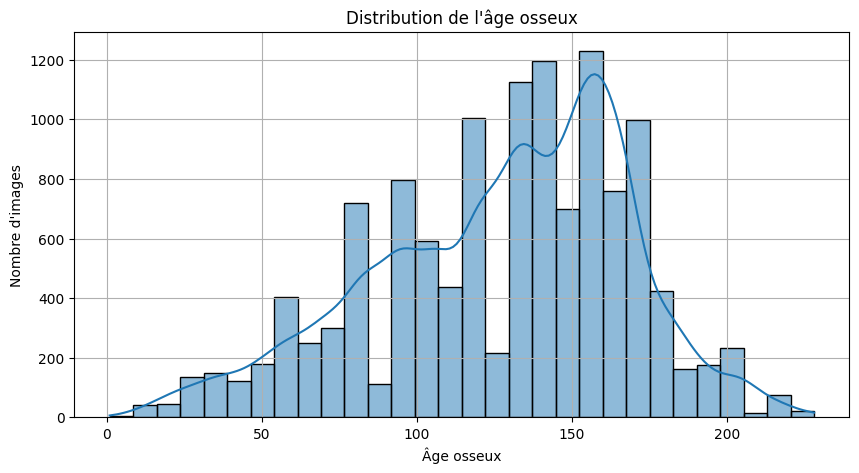

In [7]:
# Plot bone age distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['boneage'], bins=30, kde=True)
plt.xlabel("Âge osseux")
plt.ylabel("Nombre d'images")
plt.title("Distribution de l'âge osseux")
plt.grid(True)
plt.show()

* La majorité des enfants ont un âge osseux entre 8 et 13 ans.
* Il y a une légère asymétrie vers la gauche (plus de valeurs élevées).
* on observe un 1er pic vers ** 110-120 mois -> 9-10 ans et puis un pic majeur vers 150-160 mois -> 12-13 ans 
* Peu de valeurs extrêmes, indiquant une bonne représentativité de l'échantillon → C'est vrai qu'il y a très peu d’enfants de moins de 50 mois (0-4 ans) et de plus de 200 mois (16 ans), mais ce sont des outliers naturels, car avant 4 ans, l’âge osseux n’est pas très significatif, et au-delà de 16 ans, les os de l'enfant ont atteint leur maturité.

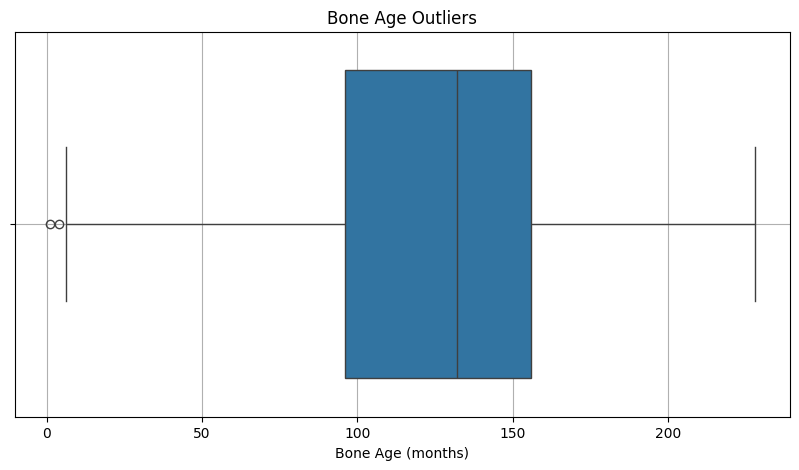


🔹 Number of Outliers Detected: 2
        id  boneage   male
18    1398        4  False
2183  3806        1   True


In [8]:
# Outlier detection using Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["boneage"])
plt.title("Bone Age Outliers")
plt.xlabel("Bone Age (months)")
plt.grid(True)
plt.show()

# IQR method
Q1 = df['boneage'].quantile(0.25)
Q3 = df['boneage'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['boneage'] < (Q1 - 1.5 * IQR)) | (df['boneage'] > (Q3 + 1.5 * IQR))]

print("\n🔹 Number of Outliers Detected:", len(outliers))
print(outliers[['id', 'boneage', 'male']].head())  # Display some outliers

* Puisque la distribution est légèrement asymétrique et qu'il y a très peu de valeurs aberrantes qui ne vont pas vraiment affecter notre modèle, nous choisissons de les ignorer.

In [9]:
nb_male = df[df["male"] == 1].shape[0]
nb_female = df[df["male"] == 0].shape[0]

print(f"Nombre de garçons : {nb_male}")
print(f"Nombre de filles : {nb_female}")

Nombre de garçons : 6833
Nombre de filles : 5778


C:\Users\chahi\AppData\Local\Temp\ipykernel_2084\2234308779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='male', data=df, palette="Set2")


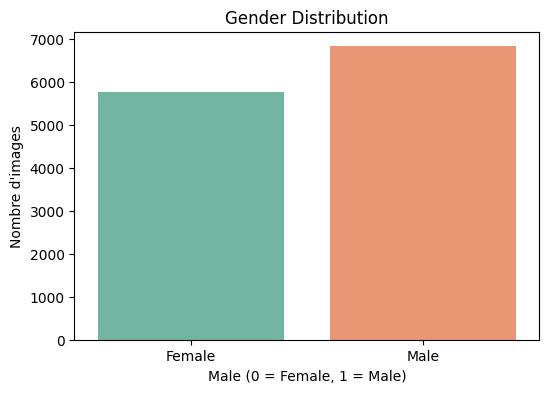

In [10]:
# Check gender balance
plt.figure(figsize=(6, 4))
sns.countplot(x='male', data=df, palette="Set2")
plt.title("Gender Distribution")
plt.xlabel("Male (0 = Female, 1 = Male)")
plt.ylabel("Nombre d'images")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.show()

* On observe une différence de 1 055 radiographies entre les données sur les mâles (6833) et les femelles (5778) qui représente un déséquilibre relatif de ~8.3%. 
* Ce n'est pas une énorme différence qui peut causer un probléme mais cela reste a vérifier ( si ton modèle a un taux d’erreur plus élevé sur les filles que sur les garçons?) aprés l'entrainement de notre modele en utilisant des  métriques adaptées.

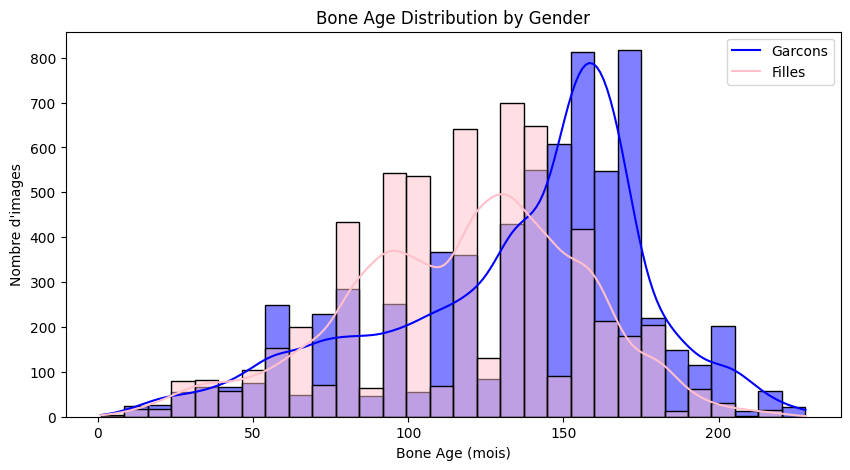

In [11]:
# Compare bone age distribution per gender
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="boneage", hue="male", bins=30, kde=True, palette=["pink", "blue"])
plt.title("Bone Age Distribution by Gender")
plt.xlabel("Bone Age (mois)")
plt.ylabel("Nombre d'images")
plt.legend(["Garcons", "Filles"])
plt.show()

* On remarque que les filles atteignent leur pic plus tôt, autour de 110-120 mois, tant que Les garçons ont une répartition plus tardive de l'âge osseux, avec un pic autour de 150-160 mois.
* Les filles ont une maturation osseuse plus précoce, ce qui est conforme aux observations médicales.

In [12]:
import pandas as pd

summary_stats = df.groupby("male")["boneage"].describe()
print(summary_stats)



        count        mean        std  min    25%    50%    75%    max
male                                                                 
False  5778.0  117.880235  37.908112  4.0   94.0  120.0  144.0  216.0
True   6833.0  135.303673  42.143162  1.0  108.0  150.0  162.0  228.0


C:\Users\chahi\AppData\Local\Temp\ipykernel_2084\4211335476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["male"], y=df["boneage"], palette=["pink", "blue"])


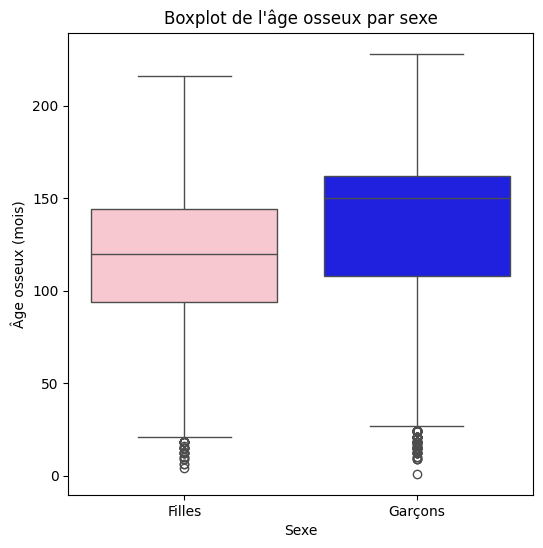


🔹 Number of Outliers Detected: 128
       id  boneage   male
1    1378       12  False
18   1398        4  False
61   1445       21   True
85   1473       12  False
108  1497       24   True


In [13]:
#détecter les valeurs aberrantes
# Visualisation
plt.figure(figsize=(6,6))
sns.boxplot(x=df["male"], y=df["boneage"], palette=["pink", "blue"])
plt.xticks([0, 1], ["Filles", "Garçons"])
plt.xlabel("Sexe")
plt.ylabel("Âge osseux (mois)")
plt.title("Boxplot de l'âge osseux par sexe")
plt.show()

# IQR method
Q1 = df.groupby("male")["boneage"].quantile(0.25)
Q3 = df.groupby("male")["boneage"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Function to check if a row is an outlier:
#Bone age varies by gender, so lower_bound[gender] gets that gender’s specific lower bound.
def is_outlier(row):
    gender = row["male"]
    value = row["boneage"]
    return value < lower_bound[gender] or value > upper_bound[gender]

outliers = df[df.apply(is_outlier, axis=1)]

print("\n🔹 Number of Outliers Detected:", len(outliers))
print(outliers[['id', 'boneage', 'male']].head())  # Display some outliers


* Les garçons ont un âge osseux médian plus élevé:
Filles -> 110-120 mois
Garcons -> environ 150 mois 
* La méthode IQR détecte 143 outliers,Qui sont des valeurs très basses (< 30 mois ~ 2,5 ans).
* La distribution de l'âge osseux est plus homogène chez les filles car: 
> * L'IQR (Interquartile Range) est plus concentré, indiquant une dispersion plus faible ainsi elles ont une croissance plus régulière.
> * L'IQR est plus large, suggérant une plus grande variabilité et il y a plus de garçons avec un âge osseux très élevé, ce qui est du à une puberté plus précoce et tardive.


